# Parkinson's Disease Detection

A machine learning model that can detect whether a patient has Parkinson's disease or not.

## Data

The data is from: https://www.kaggle.com/datasets/dipayanbiswas/parkinsons-disease-speech-signal-features

Data Information:

* Data Set Characteristics: Multivariate
* Number of Instances: 756
* Area: Computer
* Attribute Characteristics: Integer, Real
* Number of Attributes: 754
* te Donated: 2018-11-05
* Associated Tasks: Classification
* Missing values?: N/A
* Number of Web Hits: 34405

Columns Description:

* Baseline Features: Col3 to Col23
* Intensity Parameters: Col24 to Col26
* Formant Frequencies: Col27 to Col30
* Bandwidth Parameters: Col31 to Col34
* Vocal Fold: Col35 to Col56
* MFCC: Col57 to Col140
* Wavelet Features: Col141 to Col322
* TQWT Features: Col323 to Col754
* Class: Col_755

## How the model was made

The model was made using [Scikit-Learn](https://scikit-learn.org/) an excellent machine learning library. I used Random Forest Classifer as the model.

## How the notebook is structured

* Explore the data
* Visualize our data
* Fit and instantiate the mode;
* Describe our model

### What you will find

* Awesome Graphs that visualize the data
* Use of [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)
* Use of Scikit-Learn's manu features
* Testing with many models
* A ROC Curve
* Many Visual Confusion Matrix
* A custom Classification Report


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

## Explore our Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/machine-learning-projects/parkinsons-disease-detection/data/pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
len(df)

756

In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [8]:
df.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

## Visualize data

In [9]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


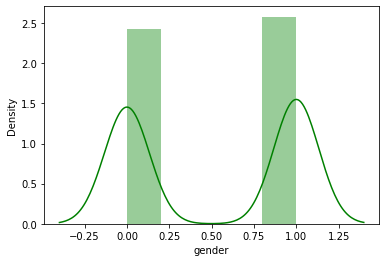

In [10]:
sns.distplot(df["gender"], color = "Green");

In [11]:
pd.crosstab(df["class"], df["gender"])

gender,0,1
class,,
0,123,69
1,243,321


In [12]:
condition = ["Does not have Parkinson's","Does have Parkinson's"]

have_or_not = df["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["class"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether patient has Parkinson's or not")
fig.show()

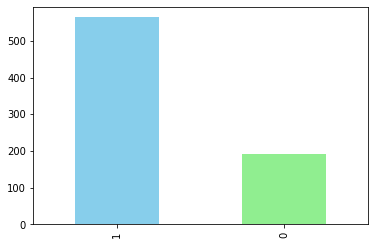

In [13]:
df["class"].value_counts().plot(kind = "bar", color = ["skyblue", "lightgreen"]);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



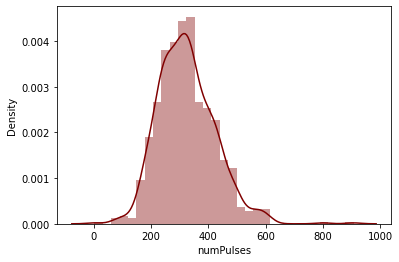

In [14]:
sns.distplot(df["numPulses"], color = "maroon");

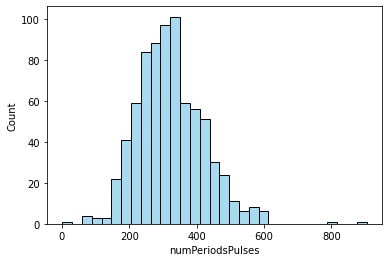

In [15]:
sns.histplot(df["numPeriodsPulses"], color = "skyblue");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



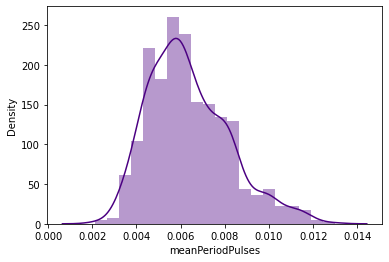

In [16]:
sns.distplot(df["meanPeriodPulses"], color = "indigo");

## Fit and instantiate model

In [17]:
def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [18]:
X = df.drop("class", axis = 1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
models = {
            "Linear SVM": LinearSVC(),
            "Random Forest": RandomForestClassifier(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "Bagging Classifier": BaggingClassifier()
         }

In [20]:
model_scores = evaluate(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)

model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'Linear SVM': 0.7960526315789473,
 'Random Forest': 0.9013157894736842,
 'KNeighborsClassifier': 0.756578947368421,
 'Bagging Classifier': 0.868421052631579}

In [21]:
model_scores = model_scores.values()
model_scores = list(model_scores)

svc = model_scores[0]
random_forest = model_scores[1]
neighbors = model_scores[2]
bagging = model_scores[3]

In [22]:
model_scores

[0.7960526315789473, 0.9013157894736842, 0.756578947368421, 0.868421052631579]

In [23]:
print(f"Linear SVM: {svc * 100:.2f}%")
print(f"Random Forest Classifier: {random_forest * 100:.2f}%")
print(f"KNeighbors Classifier: {neighbors * 100:.2f}%")
print(f"Bagging Classifier: {bagging * 100:.2f}%")

Linear SVM: 79.61%
Random Forest Classifier: 90.13%
KNeighbors Classifier: 75.66%
Bagging Classifier: 86.84%


#### RandomForest vs Bagging Classifier

In [24]:
np.random.seed(42)

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9013157894736842

In [25]:
y_preds = model.predict(X_test)

In [42]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")

In [43]:
model_report(y_test, y_preds)

Accuracy: 90.13%
Precision: 0.9015151515151515
Recall: 0.9834710743801653
F1 Score: 0.940711462450593


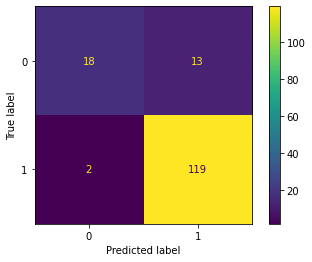

In [44]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                        y_pred = y_preds);

Bagging Classifier

In [45]:
np.random.seed(42)

bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)

bagging_model.score(X_test, y_test)

0.881578947368421

In [46]:
bagging_preds = bagging_model.predict(X_test)

In [47]:
model_report(y_test, bagging_preds)

Accuracy: 88.16%
Precision: 0.9186991869918699
Recall: 0.9338842975206612
F1 Score: 0.9262295081967213


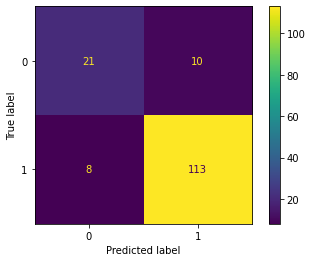

In [48]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                        y_pred = bagging_preds);

RandomForestClassifier Wins.


**Note:** I have tried Hyperparameter tuning for this model, however it gives a low score than the original score.

In [49]:
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.81, 0.19, 0.23, 0.87, 0.96, 0.95, 0.84, 0.49, 0.78, 0.8 ])

In [50]:
roc_auc_score(y_test, y_probs_positive)

0.9517462010130632

In [51]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

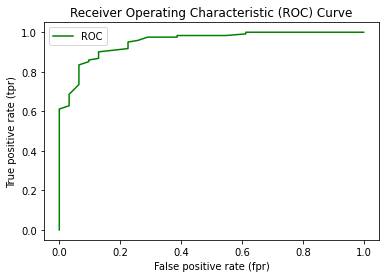

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_curve(fpr, tpr)

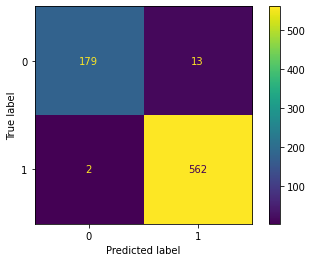

In [53]:
ConfusionMatrixDisplay.from_estimator(estimator = model, X = X, y = y);

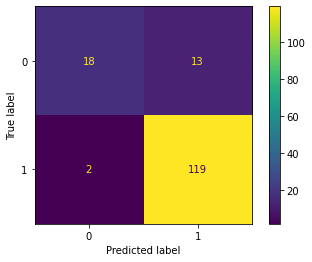

In [54]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                        y_pred = y_preds);

In [55]:
model_report(y_test, y_preds)

Accuracy: 90.13%
Precision: 0.9015151515151515
Recall: 0.9834710743801653
F1 Score: 0.940711462450593
